In [2]:
from google.cloud import storage
import geopandas as gpd

In [ ]:
## OpenAIP
#   https://www.openaip.net/docs
storage_client = storage.Client.create_anonymous_client()
bucket_name = "29f98e10-a489-4c82-ae5e-489dbcd4912f"
## List all blobs in the bucket starting with the country code (e.g.: de_*)
country_code = "de"
for blob in storage_client.list_blobs(bucket_name, prefix=country_code):
  print(str(blob))

In [44]:
source_blob_name = "de_asp.geojson"
destination_file_name = "/home/samtal/rap/data/test.geojson"

bucket = storage_client.bucket(bucket_name)
blob = bucket.blob(source_blob_name)
blob.download_to_filename(destination_file_name)

print(
    "Downloaded public blob {} from bucket {} to {}.".format(
        source_blob_name, bucket.name, destination_file_name
    )
)

Downloaded public blob de_asp.geojson from bucket 29f98e10-a489-4c82-ae5e-489dbcd4912f to /home/samtal/rap/data/test.geojson.


,name,type,icaoClass,onDemand,onRequest,byNotam,specialAgreement,country,lowerLimit,activeFrom,activeUntil,activity,hoursOfOperation,requestCompliance,geometry
10,BALE-MULHOUSE,4,3,False,False,False,False,DE,"{'value': 0, 'unit': 1, 'referenceDatum': 0}",NaT,NaT,0,"{'operatingHours': [{'dayOfWeek': 0, 'startTim...",False,"POLYGON ((7.59333 47.68917, 7.68528 47.56639, ..."
53,CTR ANSBACH,4,3,False,False,False,False,DE,"{'value': 0, 'unit': 1, 'referenceDatum': 0}",NaT,NaT,0,"{'operatingHours': [{'dayOfWeek': 0, 'startTim...",False,"POLYGON ((10.52222 49.24389, 10.49222 49.34250..."
54,CTR AUGSBURG,4,3,False,False,False,False,DE,"{'value': 0, 'unit': 1, 'referenceDatum': 0}",NaT,NaT,0,"{'operatingHours': [{'dayOfWeek': 0, 'startTim...",False,"POLYGON ((10.75833 48.45694, 11.04444 48.52222..."
55,CTR BERLIN,4,3,False,False,False,False,DE,"{'value': 0, 'unit': 1, 'referenceDatum': 0}",NaT,NaT,0,"{'operatingHours': [{'dayOfWeek': 0, 'startTim...",False,"POLYGON ((13.16722 52.36361, 13.74083 52.49917..."
56,CTR BRAUNSCHWEIG,4,3,False,False,False,False,DE,"{'value': 0, 'unit': 1, 'referenceDatum': 0}",NaT,NaT,0,"{'operatingHours': [{'dayOfWeek': 0, 'startTim...",False,"POLYGON ((10.68611 52.37778, 10.70000 52.27778..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,SECTOR MELLENTHIN,0,3,False,False,False,False,DE,"{'value': 0, 'unit': 1, 'referenceDatum': 0}",NaT,NaT,0,"{'operatingHours': [{'dayOfWeek': 0, 'startTim...",False,"POLYGON ((14.01389 53.95556, 14.09806 53.94139..."
561,SEKTOR ANSBACH-PETERSD. (HX),0,3,False,False,False,False,DE,"{'value': 0, 'unit': 1, 'referenceDatum': 0}",NaT,NaT,0,"{'operatingHours': [{'dayOfWeek': 0, 'startTim...",False,"POLYGON ((10.70528 49.36944, 10.70500 49.36556..."
562,SEKTOR EDMA SEGELFLUG,0,3,False,False,False,False,DE,"{'value': 0, 'unit': 1, 'referenceDatum': 0}",NaT,NaT,0,"{'operatingHours': [{'dayOfWeek': 0, 'startTim...",False,"POLYGON ((10.92694 48.37111, 10.90306 48.38333..."
563,SEKTOR KAMEN 1A,0,3,False,False,False,False,DE,"{'value': 0, 'unit': 1, 'referenceDatum': 0}",NaT,NaT,0,"{'operatingHours': [{'dayOfWeek': 0, 'startTim...",False,"POLYGON ((7.63750 51.58583, 7.76972 51.63222, ..."


663
77
Index(['name', 'type', 'icaoClass', 'onDemand', 'onRequest', 'byNotam',
       'specialAgreement', 'country', 'lowerLimit', 'activeFrom',
       'activeUntil', 'activity', 'hoursOfOperation', 'requestCompliance',
       'geometry'],
      dtype='object')
77


<AxesSubplot: >

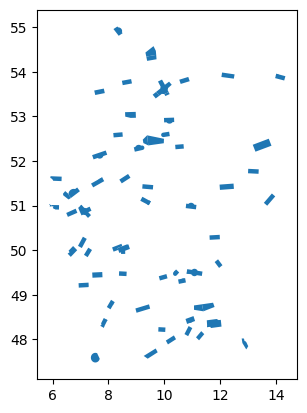

In [32]:
def filter_by_icao_class(gdf):
       gdf = gdf[(gdf['icaoClass'] == 1) | (gdf['icaoClass'] == 2) | (gdf['icaoClass'] == 3)]
       return gdf

def filter_by_relevant_keys(gdf):
       relevant_fields = ['name', 'type', 'icaoClass', 'onDemand', 'onRequest', 'byNotam',
              'specialAgreement', 'country', 'lowerLimit', 'activeFrom',
              'activeUntil', 'activity', 'hoursOfOperation', 'requestCompliance',
              'geometry'] 
       return gdf[relevant_fields]

def filter_by_lower_limit(gdf):
       METER = 0
       FEET = 1
       FLIGHTLEVEL = 6
       gdf = gdf[ 
              ( gdf['lowerLimit'].apply(lambda x: x['unit']==METER and x['value'] < 200) ) |
              ( gdf['lowerLimit'].apply(lambda x: x['unit']==FEET and x['value'] < 500) ) |
              ( gdf['lowerLimit'].apply(lambda x: x['unit']==FLIGHTLEVEL and x['value'] < 60) )
       ]
       return gdf

gdf = gpd.read_file("../data/test.geojson")

print(len(gdf))
gdf = filter_by_icao_class(gdf)
gdf = filter_by_relevant_keys(gdf)
gdf = filter_by_lower_limit(gdf)
print(len(gdf))

print(gdf.keys())
print(len(gdf))
gdf.head()
gdf.plot()

## GeoJSON description
# https://docs.openaip.net/#/Airspaces/get_airspaces

Contains the actual query result items in JSON format.

{
description:	
Response payload of a airspace instance.

_id	string
example: 60085dd4268e90000eb327ce
The document's internal reference ID value.

name	string
dataIngestion	boolean
Indicates if this airspace was created by a data ingestion process - this also means that it will be removed when the next data ingestion process is run. During data ingestion, only airspaces that are marked as "true" will be removed/replaced. This flag is set internally and cannot be edited.

type	integer
The airspace type. Possible values:

0: Other
1: Restricted
2: Danger
3: Prohibited
4: Controlled Tower Region (CTR)
5: Transponder Mandatory Zone (TMZ)
6: Radio Mandatory Zone (RMZ)
7: Terminal Maneuvering Area (TMA)
8: Temporary Reserved Area (TRA)
9: Temporary Segregated Area (TSA)
10: Flight Information Region (FIR)
11: Upper Flight Information Region (UIR)
12: Air Defense Identification Zone (ADIZ)
13: Airport Traffic Zone (ATZ)
14: Military Airport Traffic Zone (MATZ)
15: Airway
16: Military Training Route (MTR)
17: Alert Area
18: Warning Area
19: Protected Area
20: Helicopter Traffic Zone (HTZ)
21: Gliding Sector
22: Transponder Setting (TRP)
23: Traffic Information Zone (TIZ)
24: Traffic Information Area (TIA)
25: Military Training Area (MTA)
26: Controlled Area (CTA)
27: ACC Sector (ACC)
28: Aerial Sporting Or Recreational Activity
29: Low Altitude Overflight Restriction

Enum:
Array [ 32 ]
icaoClass	integer
The airspace ICAO class. Possible values:
0: A
1: B
2: C
3: D
4: E
5: F
6: G
8: Unclassified / Special Use Airspace (SUA)

Enum:
Array [ 8 ]
activity	integer
The intended activity for this airspace if defined in 'ENR 5.5 Aerial sporting and recreational activities'. The default activity is 'NONE' which applies to all other airspaces not defined in ENR 5.5. Possible values:

0: None - No specific activity (default)
1: Parachuting Activity
2: Aerobatics Activity
3: Aeroclub And Arial Work Area
4: Ultra Light Machine (ULM) Activity
5: Hang Gliding/Paragliding

Enum:
Array [ 6 ]
onDemand	boolean
onRequest	boolean
byNotam	boolean
specialAgreement	boolean
Indicates whether this airspace is related to a special agreement or not. Normally, airspaces are not based on a "special agreement" but there may be airspaces that may only be used by members of a certain club or if they personally signed a letter of agreement.

requestCompliance	boolean
An airspace that is most often not found in eAIPs but is defined by other regional/national authorities, e.g. natural reserves and monuments in the US. Those airspaces are not official but authorities request compliance of those if possible. In several cases, aircraft like UAVs are not allowed to enter those airspaces.

geometry	{...}
example: OrderedMap { "type": "Polygon", "coordinates": List [ List [ List [ 9.1234, 45.42432 ], List [ 10.1234, 45.42432 ], List [ 10.1234, 47.42432 ], List [ 9.1234, 45.42432 ] ] ] }
country	ISO 3166-1 Alpha-2 Country code{...}
example: DE
upperLimit	{
description:	
Defines an airspace vertical limit. The vertical limit is a combination of an integer value, a measurement unit and a reference datum.

value*	integer
unit*	integer
The vertical limit unit. Possbile values:

0: Meter
1: Feet
6: Flight Level

referenceDatum*	integer
The reference datum. Possible values:
0: GND
1: MSL
2: STD
}
lowerLimit	{...}
upperLimitMax	{...}
lowerLimitMin	{...}
frequencies	[...]
hoursOfOperation	{...}
activeFrom	string($date-time)
activeUntil	string($date-time)
remarks	string
createdBy	string
UID of user that created this document.

updatedBy	string
UID of user that updated this document.

createdAt	string($date-time)
The creation date for this document as ISO 8601 date.

updatedAt	string($date-time)
The updated date for this document as ISO 8601 date.

}